# Area Optimisation
 
# Outcome: There is tentatively a 15x15 cm plottable target area.


Investigate what setup works best to maximise plottable area

In [5]:
import matplotlib.pyplot as plt
from celluloid import Camera
import numpy as np
from tqdm import tqdm
import calibration

100%|██████████| 360/360 [00:00<00:00, 522.77it/s]


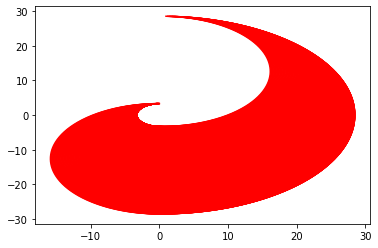

In [6]:
maxrange = 160

l1 = calibration.l1
l2 = calibration.l2

a1_disp = calibration.a1_correction
a2_disp = calibration.a2_correction

dir1 = 1
dir2 = -1

res = 360 # resolution of line
######################################
fig, ax = plt.subplots(1,1)
camera = Camera(fig)
#plt.gca().invert

a1s = np.linspace(a1_disp, 180, res)
a2s = np.linspace(a2_disp, 180, res)
a1s = np.deg2rad(a1s)
a2s = np.deg2rad(a2s)

a1s+=np.pi/2 

if dir1 == -1:
    a1s = np.flip(a1s)
if dir2 == -1:
    a2s = np.flip(a2s)
  
lines = []
for a1 in tqdm(a1s):
    xs = []
    ys = []
    for a2 in a2s:
        x1, y1 = -l1*np.cos(a1), l1*np.sin(a1)
        x2, y2 = x1-l2*np.cos(a1+a2), y1+l2*np.sin(a1+a2)
        xs.append(x2)
        ys.append(y2)
    lines.append((xs, ys))
for (x, y) in lines:
    plt.plot(x, y, "r-")

### Extract outline of plottable area

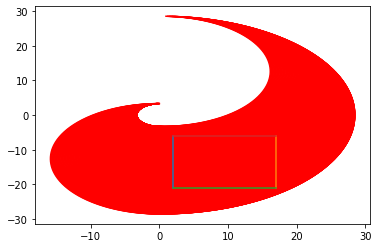

In [8]:
for (x, y) in lines:
    plt.plot(x, y, "r-")
#plt.gca().invert_xaxis()
top = -6
bottom = -21
left = 2
right = 17
plt.plot((left, left),(bottom, top))
plt.plot((right, right),(bottom, top))
plt.plot((left, right),(bottom, bottom))
plt.plot((left, right),(top, top))

In [18]:
def get_double_joint_lines(x1, y1, x2, y2):
    for a,b,c,d in zip(x1, y1, x2, y2):
        yield np.array([0, a, c]), np.array([0, b, d])

100%|██████████| 10/10 [00:00<00:00, 96.00it/s]


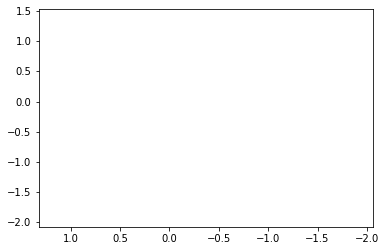

In [67]:
maxrange = 160

l1 = 1
l2 = 1

a1_disp = 30
a2_disp = 30

dir1 = 1
dir2 = -1

res = 10
######################################
fig, ax = plt.subplots(1,1)
camera = Camera(fig)
plt.gca().invert_xaxis()
a1s = np.linspace(a1_disp, a1_disp+maxrange, res)
a2s = np.linspace(a2_disp, a2_disp+maxrange, res)
a1s = np.deg2rad(a1s)
a2s = np.deg2rad(a2s)
a1s+=np.pi/2
if dir1 == -1:
    a1s = np.flip(a1s)
if dir2 == -1:
    a2s = np.flip(a2s)
    
for a1 in tqdm(a1s):
    x1s, x2s = [], []
    y1s, y2s = [], []
    for a2 in a2s:
        x1, y1 = l1*np.cos(a1), l1*np.sin(a1)
        x2, y2 = x1+l2*np.cos(a1+a2), y1+l2*np.sin(a1+a2)
        x1s.append(x1)
        y1s.append(y1)
        x2s.append(x2)
        y2s.append(y2)
    for x, y in get_double_joint_lines(x1s, y1s, x2s, y2s):
        ax.plot(x, y, "r-")
        camera.snap()
        
animation = camera.animate()
animation.save(f'anim.gif', writer = 'imagemagick')